In [1]:
pip install --extra-index-url=https://pypi.nvidia.com polars[GPU]


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://pypi.nvidia.com
Note: you may need to restart the kernel to use updated packages.


# Polars

In [2]:
import polars as pl

In [3]:
lazy_df = pl.scan_csv("../data/boston/HousingData.csv")

result = (
    lazy_df    
    .with_columns([
         pl.when(pl.col(col).cast(pl.String) == "NA")
        .then(None)
        .otherwise(pl.col(col))
        .cast(pl.Float32)
        .alias(col)
        for col in lazy_df.collect_schema().names()
    ])
    
    .drop_nulls()
    
    .with_columns(  
        pl.when(pl.col("CRIM")<=180.)
        .then(True)
        .otherwise(False)
        .cast(pl.Float32)
        .alias("SAFE")
    )
    
    .with_columns(
        (pl.col("RM") / pl.col("MEDV") * 100)
        .alias("RM/MEDV")
        )
)

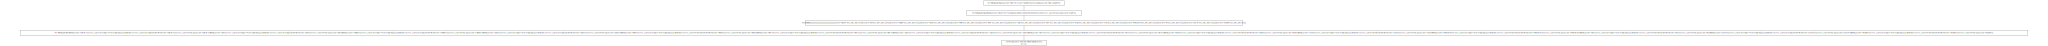

In [4]:
result.show_graph(optimized=False)

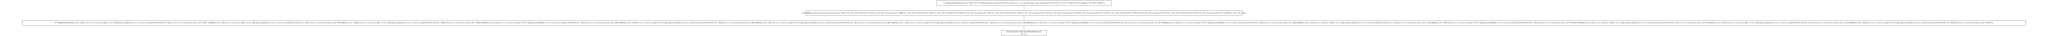

In [5]:
result.show_graph(optimized=True)

In [7]:
# Run on the CPU
result_cpu = result.collect()

# Run on the GPU
result_gpu = result.collect(engine="gpu")

In [8]:
gpu_engine = pl.GPUEngine(
    device=0, # This is the default
    raise_on_fail=True, # Fail loudly if we can't run on the GPU.
)

In [9]:
result.collect(engine=gpu_engine)

ComputeError: 'cuda' conversion failed: NotImplementedError: Can't cast STRING to STRING

In [11]:
gpu_engine = pl.GPUEngine(
    device=0, # This is the default
    raise_on_fail=False, # Fail loudly if we can't run on the GPU.
)

In [12]:
result.collect(engine=gpu_engine)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,SAFE,RM/MEDV
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.09,1.0,296.0,15.3,396.899994,4.98,24.0,1.0,27.395832
0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.6,1.0,29.726851
0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001,1.0,20.706051
0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002,1.0,20.952095
0.02985,0.0,2.18,0.0,0.458,6.43,58.700001,6.0622,3.0,222.0,18.700001,394.119995,5.21,28.700001,1.0,22.404181
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.200001,395.769989,15.1,17.5,1.0,31.822857
0.22438,0.0,9.69,0.0,0.585,6.027,79.699997,2.4982,6.0,391.0,19.200001,396.899994,14.33,16.799999,1.0,35.875
0.04527,0.0,11.93,0.0,0.573,6.12,76.699997,2.2875,1.0,273.0,21.0,396.899994,9.08,20.6,1.0,29.708736
